In [279]:
import pandas as pd

In [280]:
import numpy as np

In [281]:
import yfinance as yf

In [282]:
import matplotlib.pyplot as pyplot

In [283]:
from datetime import datetime

In [284]:
import seaborn as sns

In [285]:
import scipy.stats

In [286]:
class Readstock:
    #data =[]
    stockname=''
    def __init__(self,stockname):
        self.stockname=stockname
    def Getdatayf(self):
        self.stockname= self.stockname.upper()
        data = yf.download(self.stockname)
        #data = data.reset_index()
        # Rename old index from '' to Date
        #data.rename(columns = {'':'Date'}, inplace = True)
        print(f'{self.stockname}')
        return data
    def MACDalgo(self,data) :
        data['MACD']=data['Close'].ewm(span=12).mean()-data['Close'].ewm(span=26).mean()
        data['MA9'] = data["MACD"].ewm(span=9).mean()
        data['MACDyesterday']=data['MACD'].shift(1)
        data['MA9yesterday']=data['MA9'].shift(1)
        #def conditionUp = if Value[1] < Avg[1] and Value > Avg then 1 
        UpMask = ((data['MACDyesterday'] < data['MA9yesterday']) & (data['MACD']>data['MA9']))
        data.loc[UpMask, 'Signal'] = "Buy"
        #def conditionDown = if Value[1] > Avg[1] and Value < Avg then 1 
        DownMask = ((data['MACDyesterday'] > data['MA9yesterday']) & (data['MACD']<data['MA9']))
        data.loc[DownMask, 'Signal'] = "Sell"
        return data
    def BackTest(self,data):
        Startdate = '2022-01-01';
        Startdate = datetime.strptime(Startdate,"%Y-%d-%m")
        #Closedate = pd.datetime.now().strftime("%Y-%d-%m")
        print(f'{Startdate}')
        #mask = (data['Date'] > Startdate) & (data['Date'] <= Closedate)
        data = data.loc[Startdate:,:]
        data = data.dropna(subset=['Signal'],axis=0)
        data['Profit']= data['Adj Close']- data['Adj Close'].shift(1)
        return data
    def Profitcal(self,data):
        data = data.loc[data['Signal']=="Sell",:]
        data = data.dropna(subset=['Profit'],axis=0)
        return data

    
        
        

In [287]:
mystock = input ("Enter stock ticker")
stock=Readstock(mystock)
data1 = stock.Getdatayf()
data2 = stock.MACDalgo(data1)
data3 = stock.BackTest(data2)
print(data3)
data4 = stock.Profitcal(data3)
print(data4)
print(sum(data4['Profit']))



Enter stock tickeraapl
[*********************100%***********************]  1 of 1 completed
AAPL
2022-01-01 00:00:00
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-01  174.009995  174.839996  172.309998  174.610001  173.890427   
2022-02-17  171.029999  171.910004  168.470001  168.880005  168.398331   
2022-03-18  160.509995  164.479996  159.759995  163.979996  163.512283   
2022-04-08  171.779999  171.779999  169.199997  170.089996  169.604874   
2022-05-27  145.389999  149.679993  145.259995  149.639999  149.432434   
2022-06-13  132.869995  135.199997  131.440002  131.880005  131.697067   
2022-06-23  136.820007  138.589996  135.630005  138.270004  138.078201   
2022-08-22  169.690002  169.860001  167.139999  167.570007  167.570007   
2022-10-17  141.070007  142.899994  140.270004  142.410004  142.410004   

               Volume      MACD       MA9  MACDyesterday  MA9yesterd

In [288]:
pyplot.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

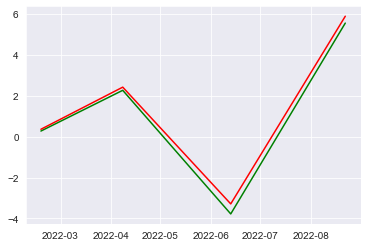

In [289]:
pyplot.plot(data4['MACD'],color='green')
pyplot.plot(data4['MA9'],color='red')

In [290]:
ploty.show()

In [291]:
data3.groupby('Signal').agg({'Profit':['sum', 'mean','std', 'var']}).reset_index()

Signal     Profit                                  
                sum       mean        std         var
0    Buy -43.837357 -10.959339  14.423557  208.038992
1   Sell  12.356934   3.089233  20.111516  404.473061

In [292]:
data3[data3.Signal=="Sell"].groupby('Signal').agg({'Profit':['mean', 'std', 'var']}).reset_index()

Signal    Profit                       
              mean        std         var
0   Sell  3.089233  20.111516  404.473061

In [293]:
Profitmean = data4['Profit'].mean()

In [294]:
Profitstd = data4['Profit'].std()

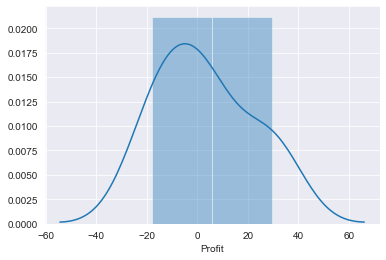

In [304]:
sns.set_style('darkgrid')
sns.distplot(data4['Profit'])

In [296]:
prob_less_0 = scipy.stats.norm.cdf((0 - Profitmean)/Profitstd)
print(1 - prob_less_0)

0.5610394820677507


In [297]:
s = pd.Series([12,'dozen'],index=['a','b'])
s['b']

'dozen'

In [298]:
s.b

'dozen'

In [299]:
mydataframe = pd.DataFrame({'Name':['qwe','asd','zxc'],'Subject':['phy','chem','bio']})

In [300]:
mydataframe.shape

(3, 2)

In [301]:
mydataframe.values

array([['qwe', 'phy'],
       ['asd', 'chem'],
       ['zxc', 'bio']], dtype=object)

In [302]:
mydataframe.columns

Index(['Name', 'Subject'], dtype='object')

In [303]:
mydataframe.dtypes

Name       object
Subject    object
dtype: object